In [45]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import system.tunable_full_cosine as full_system
importlib.reload(full_system)
import system.tunable_truncated_power_series as truncated_system
importlib.reload(truncated_system)
import system.experimental_september as fixed_truncated_system
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as tukey
importlib.reload(tukey)
import pulse.tukey_derivative as tukey_derivative
importlib.reload(tukey_derivative)
import utils.expectation_values as expect
importlib.reload(expect)
import optimization.grape as grape
importlib.reload(grape)
import utils.graph as graph
importlib.reload(graph)

pass

In [46]:
basis_size = 10
full_system.setup(_E_c = full_system.E_c, _E_j = full_system.E_j, _basis_size=basis_size)
truncated_system.setup(_omega= truncated_system.omega, _anharm=truncated_system.anharm, _basis_size=basis_size)

24.951596996312357 0.0 -36.149348062641096 -61.10094504266374
8.217198993340881 8.217198998770787 8.217198998770787


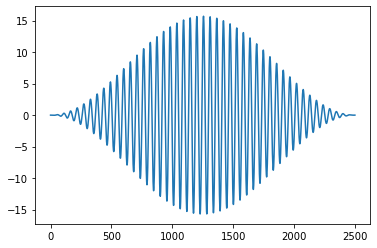

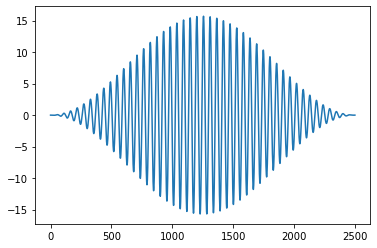

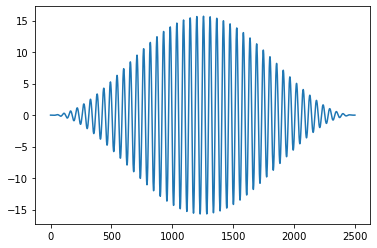

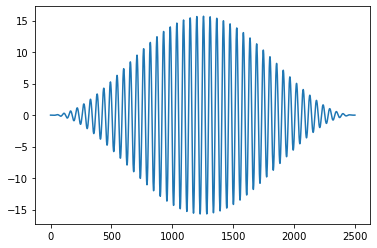

In [47]:
amplitude = 2.5*(2*np.pi)
duration = 25
offset = 0.1
drive_frequency_from_full = (full_system.energies[1] - full_system.energies[0])/3 - offset
drive_frequency_from_truncated = (truncated_system.energies[1] - truncated_system.energies[0])/3 - offset
drive_frequency_from_fixed_truncated = (fixed_truncated_system.energies[1] - fixed_truncated_system.energies[0])/3 - offset
tlist = np.linspace(0, duration+10, duration*100)
print(truncated_system.energies[1], truncated_system.energies[0], full_system.energies[1], full_system.energies[0])
print(drive_frequency_from_full, drive_frequency_from_truncated, drive_frequency_from_fixed_truncated)


tukey.setup(amplitude, drive_frequency_from_full, 1, tlist)
plt.plot(tukey.get_pulse(tlist))
plt.show()
full_solution = solver.time_evolve(H_d = full_system.H0, H_c=full_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=full_system.starting_state, pbar=True)
plt.plot(tukey.get_pulse(tlist))
plt.show()

tukey.setup(amplitude, drive_frequency_from_truncated, 1, tlist)
plt.plot(tukey.get_pulse(tlist))
plt.show()
truncated_solution = solver.time_evolve(H_d = truncated_system.H0, H_c=truncated_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=truncated_system.starting_state, pbar=True)
plt.plot(tukey.get_pulse(tlist))
plt.show()

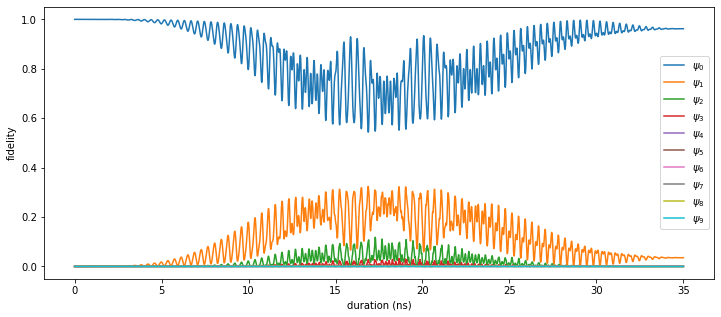

In [48]:
graph.graph_solution(full_solution, full_system)

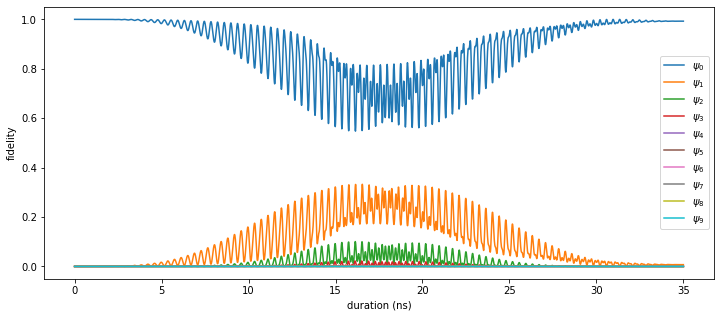

In [49]:
graph.graph_solution(truncated_solution, truncated_system)

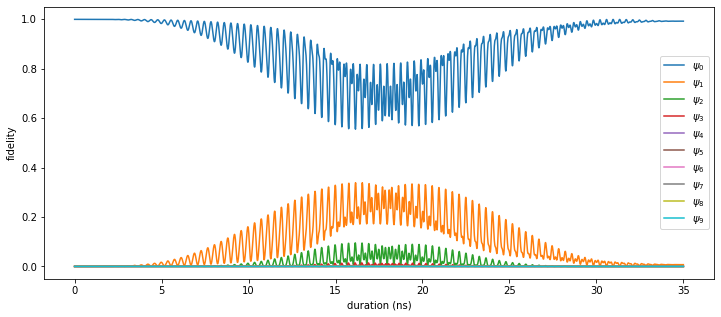

In [50]:
tukey.setup(amplitude, drive_frequency_from_full, 1, tlist)
fixed_solution = solver.time_evolve(H_d = fixed_truncated_system.H0, H_c=fixed_truncated_system.H1, pertubation_func=tukey.pulse_func, tlist=tlist, starting_state=fixed_truncated_system.starting_state, pbar=True)
graph.graph_solution(fixed_solution, fixed_truncated_system)